<a href="https://colab.research.google.com/github/NaumanAnwar97/ModelEvaluation/blob/main/Model_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('./Sample4.csv')
df.head(5)

,M-Y,qty_ordered,sku_number,CPI,U.S. Dollar
0,7/1/2016,6,0,4.1,104.7381
1,7/1/2016,5,1,4.1,104.7381
2,7/1/2016,1,2,4.1,104.7381
3,7/1/2016,5,3,4.1,104.7381
4,7/1/2016,3,4,4.1,104.7381


In [4]:
target = df['qty_ordered']
df_1 = df.drop(['M-Y', 'qty_ordered'], axis = 1)
df_1.shape

(3587, 3)

In [5]:
df_1.columns

Index(['sku_number', 'CPI', 'U.S. Dollar'], dtype='object')

# Train-Test Split

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_1, target, test_size=0.3, random_state=122)

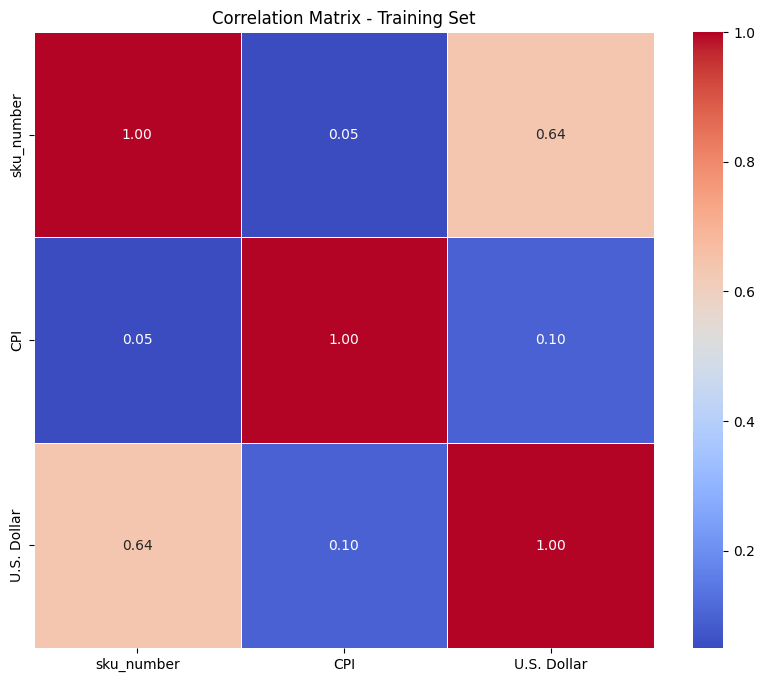

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = X_train.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix - Training Set")
plt.show()

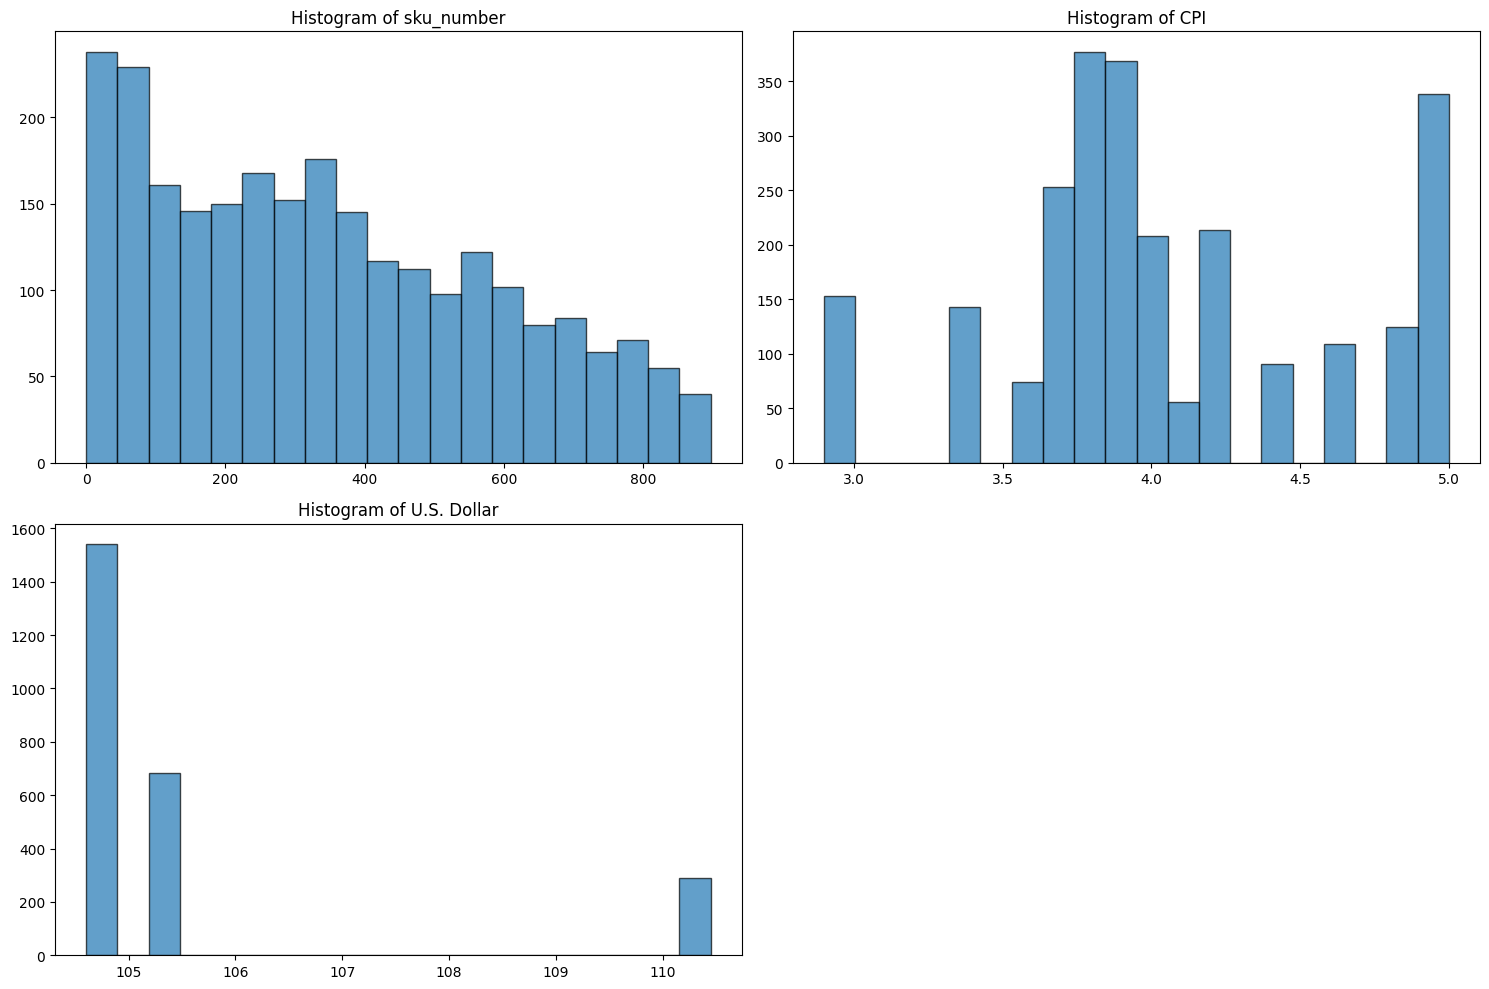

In [8]:
import matplotlib.pyplot as plt

# Assuming X_train is your training set
num_features = X_train.shape[1]  # Number of features

plt.figure(figsize=(15, 10))

for i in range(num_features):
    plt.subplot(2, 2, i + 1)  # Adjust the subplot layout based on the number of features
    plt.hist(X_train.iloc[:, i], bins=20, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {X_train.columns[i]}')

plt.tight_layout()
plt.show()

# Linear Model

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_test_pred = regr.predict(X_test)
y_train_pred = regr.predict(X_train)

In [10]:
# Perform cross-validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

cross_val_results = cross_val_score(regr, df_1, target, cv=k_fold, scoring='neg_mean_squared_error')

# The result is negative mean squared error, so we take the negative to get positive MSE
cross_val_rmse = np.sqrt(-cross_val_results)

# Print the cross-validation results
print(f'Cross-Validation RMSE: {cross_val_rmse}')
print(f'Mean RMSE: {np.mean(cross_val_rmse)}')

Cross-Validation RMSE: [ 74.56925744  44.31486411 129.23887205 180.44004382  53.53389168]
Mean RMSE: 96.41938581894165


In [11]:
import numpy as np
# The coefficients
print("Coefficients: \n", regr.coef_)
print("Coefficient of determination: %.2f" % r2_score(y_test, y_test_pred))
print("Coefficient of determination: %.2f" % r2_score(y_train, y_train_pred))


Coefficients: 
 [  0.11498217  -4.29161856 -10.51227878]
Coefficient of determination: 0.03
Coefficient of determination: 0.03


In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Mean Absolute Error
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f'Train Mean Absolute Error: {mae_train}')
print(f'Test Mean Absolute Error: {mae_test}')

# Mean Squared Error
mse = (mean_squared_error(y_test, y_test_pred))
mse_train = (mean_squared_error(y_train, y_train_pred))
print(f'Mean Squared Error on test: {mse_train}')
print(f'Mean Squared Error on test: {mse}')

from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE for both sets
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f'RMSE on Training Set: {rmse_train}')
print(f'RMSE on Testing Set: {rmse_test}')


Train Mean Absolute Error: 35.97997659678737
Test Mean Absolute Error: 31.605880211684024
Mean Squared Error on test: 15123.629334022526
Mean Squared Error on test: 4379.311590416221
RMSE on Training Set: 122.97816608659654
RMSE on Testing Set: 66.17636731051518


#  Random Forest Regressor

In [13]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor()
clf.fit(X_train, y_train)

RandomForestRegressor()

In [14]:
y_testModel_pred = clf.predict(X_test)

# Make predictions using training set
y_trainModel_pred = clf.predict(X_train)

In [15]:
# Mean Absolute Error
RFmae_train = mean_absolute_error(y_train, y_trainModel_pred)
RFmae_test = mean_absolute_error(y_test, y_testModel_pred)

print(f'Train Mean Absolute Error: {RFmae_train}')
print(f'Test Mean Absolute Error: {RFmae_test}')

# Mean Squared Error
RFmse = (mean_squared_error(y_test, y_testModel_pred))
RFmse_train = (mean_squared_error(y_train, y_trainModel_pred))
print(f'Mean Squared Error on test: {RFmse_train}')
print(f'Mean Squared Error on test: {RFmse}')

from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE for both sets
RFrmse_train = np.sqrt(mean_squared_error(y_train, y_trainModel_pred))
RFrmse_test = np.sqrt(mean_squared_error(y_test, y_testModel_pred))

print(f'RMSE on Training Set: {RFrmse_train}')
print(f'RMSE on Testing Set: {RFrmse_test}')

Train Mean Absolute Error: 11.82306374501992
Test Mean Absolute Error: 23.911030640668525
Mean Squared Error on test: 2339.9806474501993
Mean Squared Error on test: 4007.3012804085424
RMSE on Training Set: 48.373346457012865
RMSE on Testing Set: 63.303248577056


# XGBoost

In [16]:
%pip install xgboost

In [17]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


# XGBoost regression model
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10, random_state=42)

# Train the model
xg_reg.fit(X_train, y_train)

# Predictions on the testing set
y_train_pred_xg = xg_reg.predict(X_train)
y_test_pred_xg = xg_reg.predict(X_test)

# Calculate metrics

mae_trainxg = mean_absolute_error(y_train, y_train_pred_xg)
mse_trainxg = mean_squared_error(y_train, y_train_pred_xg)
rmse_trainxg = np.sqrt(mse_trainxg)

mae_xg = mean_absolute_error(y_test, y_test_pred_xg)
mse_xg = mean_squared_error(y_test, y_test_pred_xg)
rmse_xg = np.sqrt(mse_xg)

print(f'XGBoost Mean Absolute Error: {mae_trainxg}')
print(f'XGBoost Mean Absolute Error: {mae_xg}')
print(f'XGBoost Mean Squared Error: {mse_trainxg}')
print(f'XGBoost Mean Squared Error: {mse_xg}')
print(f'XGBoost Root Mean Squared Error: {rmse_trainxg}')
print(f'XGBoost Root Mean Squared Error: {rmse_xg}')

XGBoost Mean Absolute Error: 33.90371109859877
XGBoost Mean Absolute Error: 29.44626017068422
XGBoost Mean Squared Error: 14609.488052254273
XGBoost Mean Squared Error: 4024.5365769542777
XGBoost Root Mean Squared Error: 120.86971519886308
XGBoost Root Mean Squared Error: 63.43923531186578


# K-Nearest Neighbours

In [18]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


knn = KNeighborsRegressor(n_neighbors=5)  # Example with 5 neighbors

# Fit the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the testing set
y_train_pred_knn = knn.predict(X_train)
y_test_pred_knn = knn.predict(X_test)

# Calculate metrics
mae_trainknn = mean_absolute_error(y_train, y_train_pred_knn)
mse_trainknn = mean_squared_error(y_train, y_train_pred_knn)
rmse_trainknn = np.sqrt(mse_trainknn)

mae_knn = mean_absolute_error(y_test, y_test_pred_knn)
mse_knn = mean_squared_error(y_test, y_test_pred_knn)
rmse_knn = np.sqrt(mse_knn)

print(f'KNN Mean Absolute Error Train: {mae_trainknn}')
print(f'KNN Mean Absolute Error Test: {mae_knn}')
print(f'KNN Mean Squared Error Train: {mse_trainknn}')
print(f'KNN Mean Squared Error Test: {mse_knn}')
print(f'KNN Root Mean Squared Error Train: {rmse_trainknn}')
print(f'KNN Root Mean Squared Error Test: {rmse_knn}')

KNN Mean Absolute Error Train: 28.69752988047809
KNN Mean Absolute Error Test: 27.982915506035283
KNN Mean Squared Error Train: 11481.83305179283
KNN Mean Squared Error Test: 5302.374521819869
KNN Root Mean Squared Error Train: 107.1533156360214
KNN Root Mean Squared Error Test: 72.81740534940715


# Support Vector Regressor (SVR)

In [19]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

svm_model = SVR(kernel='linear')

svm_model.fit(X_train, y_train)


y_train_pred_svm = svm_model.predict(X_train)
y_test_pred_svm = svm_model.predict(X_test)

mae_trainsvm = mean_absolute_error(y_train, y_train_pred_svm)
mse_trainsvm = mean_squared_error(y_train, y_train_pred_svm)
rmse_trainsvm = np.sqrt(mse_trainsvm)

mae_svm = mean_absolute_error(y_test, y_test_pred_svm)
mse_svm = mean_squared_error(y_test, y_test_pred_svm)
rmse_svm = np.sqrt(mse_svm)

print(f'SVM Mean Absolute Error Train: {mae_trainsvm}')
print(f'SVM Mean Absolute Error Test: {mae_svm}')
print(f'SVM Mean Squared Error Train: {mse_trainsvm}')
print(f'SVM Mean Squared Error Test: {mse_svm}')
print(f'SVM Root Mean Squared Error Train: {rmse_trainsvm}')
print(f'SVM Root Mean Squared Error Test: {rmse_svm}')

SVM Mean Absolute Error Train: 28.625920989191773
SVM Mean Absolute Error Test: 24.171715715432203
SVM Mean Squared Error Train: 15813.448635485978
SVM Mean Squared Error Test: 4677.517204421788
SVM Root Mean Squared Error Train: 125.75153532059153
SVM Root Mean Squared Error Test: 68.3923768005016


# Neural Networks (Deep Learning Model)

In [20]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a neural network model
model = Sequential()
model.add(Dense(32, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))  # Output layer with linear activation for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=300, batch_size=32, validation_split=0.3)

# Predictions on the testing set
y_test_pred_nn = model.predict(X_test_scaled).flatten()

# Calculate metrics
mae_nn = mean_absolute_error(y_test, y_test_pred_nn)
mse_nn = mean_squared_error(y_test, y_test_pred_nn)
rmse_nn = np.sqrt(mse_nn)

print(f'Neural Network Mean Absolute Error: {mae_nn}')
print(f'Neural Network Mean Squared Error: {mse_nn}')
print(f'Neural Network Root Mean Squared Error: {rmse_nn}')


Epoch 1/300
55/55 [==============================] - 2s 9ms/step - loss: 16635.0488 - val_loss: 16630.9629
Epoch 2/300
55/55 [==============================] - 1s 11ms/step - loss: 16545.8340 - val_loss: 16519.8535
Epoch 3/300
55/55 [==============================] - 0s 6ms/step - loss: 16390.8398 - val_loss: 16333.5117
Epoch 4/300
55/55 [==============================] - 0s 5ms/step - loss: 16158.8682 - val_loss: 16086.0332
Epoch 5/300
55/55 [==============================] - 0s 4ms/step - loss: 15902.3652 - val_loss: 15844.3057
Epoch 6/300
55/55 [==============================] - 0s 6ms/step - loss: 15681.0029 - val_loss: 15669.9902
Epoch 7/300
55/55 [==============================] - 0s 6ms/step - loss: 15539.5713 - val_loss: 15528.6787
Epoch 8/300
55/55 [==============================] - 0s 6ms/step - loss: 15447.1523 - val_loss: 15434.2842
Epoch 9/300
55/55 [==============================] - 0s 6ms/step - loss: 15376.0742 - val_loss: 15356.2314
Epoch 10/300
55/55 [================

## Now we'll Introduce Customer Reviews into the Model and Check Whether the Model Performance Improves?

In [21]:
newDf = pd.read_csv('./Sample5.csv')
newDf.head(5)

,M-Y,qty_ordered,sku_number,CPI,U.S. Dollar,remarks,remarks_coded
0,7/1/2016,6,0,4.1,104.7381,positive,1
1,7/1/2016,5,1,4.1,104.7381,average,0
2,7/1/2016,1,2,4.1,104.7381,negative,-1
3,7/1/2016,5,3,4.1,104.7381,average,0
4,7/1/2016,3,4,4.1,104.7381,average,0


In [22]:
Dv = newDf['qty_ordered']
IVs = newDf.drop(['M-Y', 'qty_ordered', 'remarks'], axis = 1)
IVs.columns

Index(['sku_number', 'CPI', 'U.S. Dollar', 'remarks_coded'], dtype='object')

In [23]:
X_trn, X_tst, y_trn, y_tst = train_test_split(IVs, Dv, test_size=0.3, random_state=122)

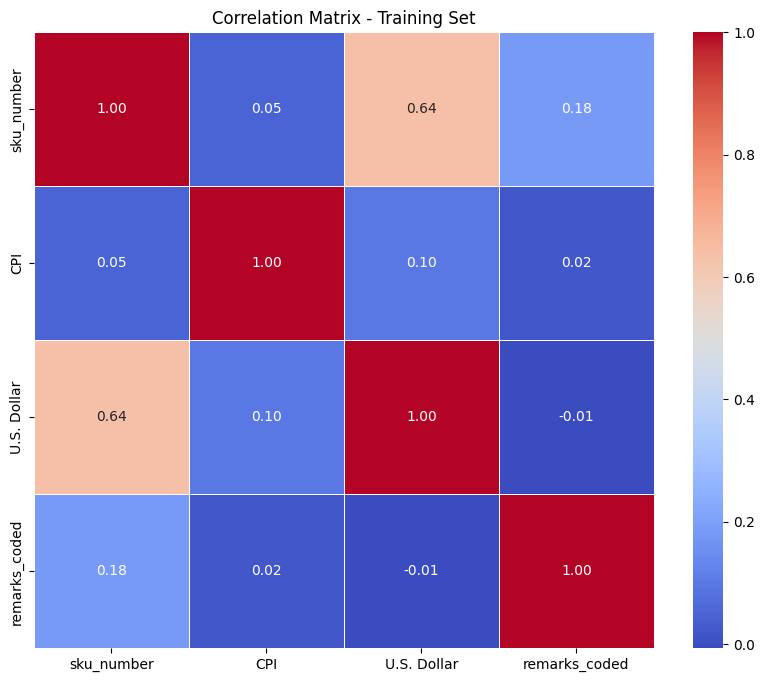

In [24]:
# Correlation Matrix
correlation_matrix = X_trn.corr()

# Plotting the correlation matrix using seaborn's heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix - Training Set")
plt.show()

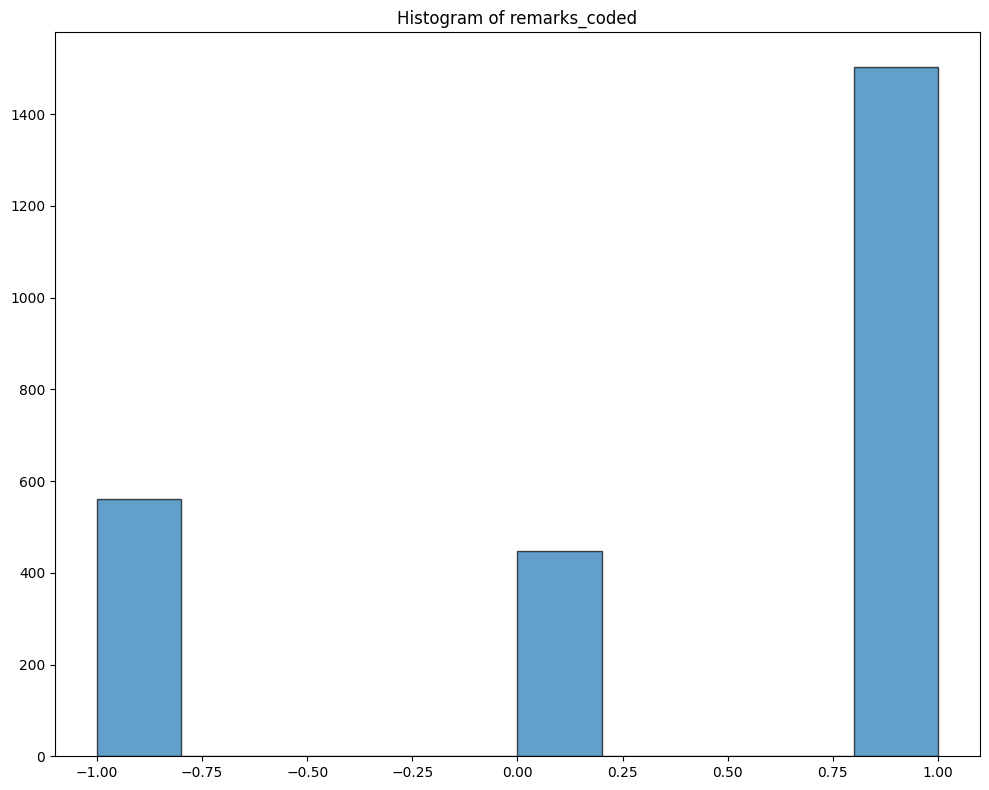

In [25]:
plt.figure(figsize=(10, 8))
plt.hist(X_trn['remarks_coded'], bins=10, edgecolor='black', alpha=0.7)
plt.title(f'Histogram of {X_trn.columns[3]}')

plt.tight_layout()
plt.show()

# Linear Model

In [26]:
# Create linear regression object
regr2 = linear_model.LinearRegression()
regr2.fit(X_trn, y_trn)
y_tst_pred = regr2.predict(X_tst)
y_trn_pred = regr2.predict(X_trn)

## Linear Model With Cross Validation

In [27]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=52)

cross_val_results2 = cross_val_score(regr2, IVs, Dv, cv=k_fold, scoring='neg_mean_squared_error')

# The result is negative mean squared error, so we take the negative to get positive MSE
cross_val_rmse2 = np.sqrt(-cross_val_results2)

# Print the cross-validation results
print(f'Cross-Validation RMSE: {cross_val_rmse2}')
print(f'Mean RMSE: {np.mean(cross_val_rmse2)}')

Cross-Validation RMSE: [ 43.94672622  80.06600096  72.86799846  62.83945868  52.71038015
 162.35651376 193.02445619  44.02454874  48.42157844 166.16573906]
Mean RMSE: 92.64234006769428


In [28]:
# The coefficients
print("Coefficients: \n", regr2.coef_)
print("Coefficient of determination: %.2f" % r2_score(y_tst, y_tst_pred))
print("Coefficient of determination: %.2f" % r2_score(y_trn, y_trn_pred))

Coefficients: 
 [ 0.08953181 -5.11056195 -8.19759403 23.6034535 ]
Coefficient of determination: 0.09
Coefficient of determination: 0.05


In [29]:
# Mean Absolute Error
mae_trn = mean_absolute_error(y_trn, y_trn_pred)
mae_tst = mean_absolute_error(y_tst, y_tst_pred)

print(f'Train Mean Absolute Error: {mae_trn}')
print(f'Test Mean Absolute Error: {mae_tst}')

# Mean Squared Error
mse2 = (mean_squared_error(y_tst, y_tst_pred))
mse_trn = (mean_squared_error(y_trn, y_trn_pred))
print(f'Mean Squared Error on test: {mse_trn}')
print(f'Mean Squared Error on test: {mse2}')

# Calculate RMSE for both sets
rmse_trn = np.sqrt(mean_squared_error(y_trn, y_trn_pred))
rmse_tst = np.sqrt(mean_squared_error(y_tst, y_tst_pred))

print(f'RMSE on Training Set: {rmse_trn}')
print(f'RMSE on Testing Set: {rmse_tst}')


Train Mean Absolute Error: 34.4270851805558
Test Mean Absolute Error: 31.467957474281874
Mean Squared Error on test: 14766.837222647602
Mean Squared Error on test: 4127.180567795108
RMSE on Training Set: 121.51887599318718
RMSE on Testing Set: 64.24313634774619


# Random Forest Regressor

In [30]:
clf.fit(X_trn, y_trn)

RandomForestRegressor()

In [31]:
# Make predictions using training and testing set
y_tstModel_pred = clf.predict(X_tst)
y_trnModel_pred = clf.predict(X_trn)

In [32]:
# Mean Absolute Error
RFmae_trn = mean_absolute_error(y_trn, y_trnModel_pred)
RFmae_tst = mean_absolute_error(y_tst, y_tstModel_pred)

print(f'Train Mean Absolute Error: {RFmae_trn}')
print(f'Test Mean Absolute Error: {RFmae_tst}')

# Mean Squared Error
RFmse2 = (mean_squared_error(y_tst, y_tstModel_pred))
RFmse_trn = (mean_squared_error(y_trn, y_trnModel_pred))
print(f'Mean Squared Error on test: {RFmse_trn}')
print(f'Mean Squared Error on test: {RFmse2}')

# Calculate RMSE for both sets
RFrmse_trn = np.sqrt(mean_squared_error(y_trn, y_trnModel_pred))
RFrmse_tst = np.sqrt(mean_squared_error(y_tst, y_tstModel_pred))

print(f'RMSE on Training Set: {RFrmse_trn}')
print(f'RMSE on Testing Set: {RFrmse_tst}')

Train Mean Absolute Error: 10.646199203187251
Test Mean Absolute Error: 21.154363974001857
Mean Squared Error on test: 2802.890147569721
Mean Squared Error on test: 3879.694112256267
RMSE on Training Set: 52.942328505362525
RMSE on Testing Set: 62.28719059530834


# XGBoost

In [33]:
# XGBoost regression model
xg_reg2 = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10, random_state=42)

# Train the model
xg_reg2.fit(X_trn, y_trn)

# Predictions on the testing set
y_trn_pred_xg = xg_reg2.predict(X_trn)
y_tst_pred_xg = xg_reg2.predict(X_tst)

# Calculate metrics

mae_trnxg = mean_absolute_error(y_trn, y_trn_pred_xg)
mse_trnxg = mean_squared_error(y_trn, y_trn_pred_xg)
rmse_trnxg = np.sqrt(mse_trnxg)

mae_xg2 = mean_absolute_error(y_tst, y_tst_pred_xg)
mse_xg2 = mean_squared_error(y_tst, y_tst_pred_xg)
rmse_xg2 = np.sqrt(mse_xg2)

print(f'XGBoost Mean Absolute Error: {mae_trnxg}')
print(f'XGBoost Mean Absolute Error: {mae_xg2}')
print(f'XGBoost Mean Squared Error: {mse_trnxg}')
print(f'XGBoost Mean Squared Error: {mse_xg2}')
print(f'XGBoost Root Mean Squared Error: {rmse_trnxg}')
print(f'XGBoost Root Mean Squared Error: {rmse_xg2}')

XGBoost Mean Absolute Error: 32.3314157022423
XGBoost Mean Absolute Error: 28.608463937304258
XGBoost Mean Squared Error: 14624.993553130673
XGBoost Mean Squared Error: 3930.5977129300845
XGBoost Root Mean Squared Error: 120.9338395699511
XGBoost Root Mean Squared Error: 62.69447912639585


# K-Nearest Neighbours

In [34]:
knn2 = KNeighborsRegressor(n_neighbors=3)

knn2.fit(X_trn, y_trn)

y_trn_pred_knn = knn2.predict(X_trn)
y_tst_pred_knn = knn2.predict(X_tst)


mae_trnknn = mean_absolute_error(y_trn, y_trn_pred_knn)
mse_trnknn = mean_squared_error(y_trn, y_trn_pred_knn)
rmse_trnknn = np.sqrt(mse_trnknn)

mae_knn2 = mean_absolute_error(y_tst, y_tst_pred_knn)
mse_knn2 = mean_squared_error(y_tst, y_tst_pred_knn)
rmse_knn2 = np.sqrt(mse_knn2)

print(f'KNN Mean Absolute Error Train: {mae_trnknn}')
print(f'KNN Mean Absolute Error Test: {mae_knn2}')
print(f'KNN Mean Squared Error Train: {mse_trnknn}')
print(f'KNN Mean Squared Error Test: {mse_knn2}')
print(f'KNN Root Mean Squared Error Train: {rmse_trnknn}')
print(f'KNN Root Mean Squared Error Test: {rmse_knn2}')

KNN Mean Absolute Error Train: 23.13997343957503
KNN Mean Absolute Error Test: 26.5140823274528
KNN Mean Squared Error Train: 9722.28880035414
KNN Mean Squared Error Test: 5919.489838027442
KNN Root Mean Squared Error Train: 98.6016673304977
KNN Root Mean Squared Error Test: 76.93822091800305


# Support Vector Regressor

In [36]:

svm_model2 = SVR(kernel='linear')

svm_model2.fit(X_trn, y_trn)


y_trn_pred_svm = svm_model2.predict(X_trn)
y_tst_pred_svm = svm_model2.predict(X_tst)

mae_trnsvm = mean_absolute_error(y_trn, y_trn_pred_svm)
mse_trnsvm = mean_squared_error(y_trn, y_trn_pred_svm)
rmse_trnsvm = np.sqrt(mse_trnsvm)

mae_svm2 = mean_absolute_error(y_tst, y_tst_pred_svm)
mse_svm2 = mean_squared_error(y_tst, y_tst_pred_svm)
rmse_svm2 = np.sqrt(mse_svm2)

print(f'SVM Mean Absolute Error Train: {mae_trnsvm}')
print(f'SVM Mean Absolute Error Test: {mae_svm2}')
print(f'SVM Mean Squared Error Train: {mse_trnsvm}')
print(f'SVM Mean Squared Error Test: {mse_svm2}')
print(f'SVM Root Mean Squared Error Train: {rmse_trnsvm}')
print(f'SVM Root Mean Squared Error Test: {rmse_svm2}')

SVM Mean Absolute Error Train: 25.960372894477985
SVM Mean Absolute Error Test: 21.75174799816636
SVM Mean Squared Error Train: 15596.227352107504
SVM Mean Squared Error Test: 4478.068080572905
SVM Root Mean Squared Error Train: 124.88485637621362
SVM Root Mean Squared Error Test: 66.918368782965


# Neural Networks (Deep Learning Model)

In [40]:
scaler2 = StandardScaler()
X_trn_scaled = scaler2.fit_transform(X_trn)
X_tst_scaled = scaler2.transform(X_tst)


model = Sequential()
model.add(Dense(32, input_dim=X_trn_scaled.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))


# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_trn_scaled, y_trn, epochs=300, batch_size=32, validation_split=0.3)

# Predictions on the testing set
y_tst_pred_nn = model.predict(X_tst_scaled).flatten()

# Calculate metrics
mae_nn2 = mean_absolute_error(y_tst, y_tst_pred_nn)
mse_nn2 = mean_squared_error(y_tst, y_tst_pred_nn)
rmse_nn2 = np.sqrt(mse_nn2)

print(f'Neural Network Mean Absolute Error: {mae_nn2}')
print(f'Neural Network Mean Squared Error: {mse_nn2}')
print(f'Neural Network Root Mean Squared Error: {rmse_nn2}')

Epoch 1/300
55/55 [==============================] - 2s 5ms/step - loss: 16664.7891 - val_loss: 16666.5547
Epoch 2/300
55/55 [==============================] - 0s 3ms/step - loss: 16602.3359 - val_loss: 16585.7695
Epoch 3/300
55/55 [==============================] - 0s 3ms/step - loss: 16483.9570 - val_loss: 16424.3340
Epoch 4/300
55/55 [==============================] - 0s 3ms/step - loss: 16274.1387 - val_loss: 16158.1074
Epoch 5/300
55/55 [==============================] - 0s 3ms/step - loss: 15981.3730 - val_loss: 15826.6826
Epoch 6/300
55/55 [==============================] - 0s 3ms/step - loss: 15629.9219 - val_loss: 15458.7979
Epoch 7/300
55/55 [==============================] - 0s 3ms/step - loss: 15296.1016 - val_loss: 15165.3135
Epoch 8/300
55/55 [==============================] - 0s 3ms/step - loss: 15054.1279 - val_loss: 14954.0654
Epoch 9/300
55/55 [==============================] - 0s 3ms/step - loss: 14912.1279 - val_loss: 14831.4072
Epoch 10/300
55/55 [=================